# RELACIÓN ENTRE ALGUNAS VARIABLES SOCIODEMOGRÁFICAS CON LA RESISTENCIA A LA INSULINA DE LA POBLACIÓN ESPAÑOLA.


# LIMPIEZA Y TRANSFORMACIÓN DE LOS DATOS.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)


import numpy as np

import warnings
warnings.filterwarnings('ignore')


import pylab as plt  # import matplotlib.pyplot as plt
import seaborn as sns

# para la grafica
#%matplotlib inline

In [2]:
#%pip install pytesseract

In [3]:
import pytesseract

In [4]:
from PIL import Image

In [5]:
import requests as req
from bs4 import BeautifulSoup as bs

In [6]:
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

In [7]:
import time

import warnings
warnings.filterwarnings('ignore')

from selenium.webdriver.common.by import By

In [8]:
#driver configuration
opciones=Options()

opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False)
opciones.headless=False    # si True, no aperece la ventana (headless=no visible)
opciones.add_argument('--start-maximized')         # comienza maximizado
#opciones.add_argument('user-data-dir=selenium')    # mantiene las cookies
#opciones.add_extension('driver_folder/adblock.crx')       # adblocker
opciones.add_argument('--incognito')

In [9]:
#from selenium import webdriver

#PATH = "driver/chromedriver" 
#driver = webdriver.Chrome(options = opciones)
#driver.get('https://www.google.es')

# 1. Fuente 1- CSV: Estudio poblacional español.

# 1.1. Exploración inicial.

In [10]:
df_original = pd.read_csv('/Users/karmelealonsoaia/Desktop/ironhack_labs/PROYECTOS/3.-project_etl/notebook/estudio_poblacional_palma_mallorca.csv', sep=';')

df = df_original.copy()

In [11]:
dim_original = df.shape # De esta forma guardo las dimensiones del data frame original.

df.shape

(58576, 75)

In [12]:
df.head()

,sexo,edad,edad_A,estudios,clasesocial,ejercicio,alimentación,tabaco,altura,peso,IMC,TAS,TAD,TART,HTA,COLESTEROL,CT,HDL,LDL,LDL_A,TRIGLICERIDOS,TG,GLUCEMIA,GLUC,DIABETES,CINTURA,CADERA,CINTALTURA,ICALT,CINTCADERA,CINTCADERA_A,AVI,AVI_A,BAI,BAI_A,WWINDEX,BSA,BSI,BRI,ABSI,VAI,DAI,CI,BFI,Deuremberg,Palafolls,RFM,ECORE,CUNBAE,METSVF,MetsIR,Sexo_num,estudios_num,clasesocial_num,ejercicio_num,CUNBAE_A,alimentacion_num,tabaco_num,HTA_num,TART_num,CT_num,TG_num,LDL_A_num,edad_A_num,GLUC_num,DIABETES_num,IMC_A,ICALT_num,METSVF_A,IMC_A_Kappa,IMC_obesidad,BAI_A_Num,BAI_A_obesidad,CUNBAE_A_Obesidad,METSVF_A_Obesidad
0,Mujer,57,50-59a,secundarios,III,si,no,no,166,62,"22,5",110,70,normal,no,185,normal,47,126,normal,61,normal,84,normal,no,58,94,"0,41",normal,"0,62",no,"7,64",normal,"25,95",saludable,"7,37","1,69","47,7","0,97","0,057","1,79","0,46","0,87","13,33","34,71","36,38","18,76","33,77","34,71","5,03","2,21997653",1,2,3,1,3,0,0,0,1,1,1,1,4,1,0,2,1,1,1,0,2,0,1,0
1,Hombre,28,20-29a,primarios,III,si,si,no,"181,5",82,"24,9",120,65,preHTA,no,197,normal,58,126,normal,66,normal,62,normal,no,96,87,"0,53",alto,"1,1",no,"18,49",normal,"17,58",saludable,"10,6","2,03","57,56","3,92","0,084","3,61","0,46","1,31","17,33","20,12","27,49","26,19","21,95","21,66","6,4","2,083982426",0,1,3,1,3,1,0,0,2,1,1,1,1,1,0,2,2,1,1,0,2,0,1,0
2,Hombre,25,20-29a,universitarios,I,no,no,no,177,69,22,120,55,preHTA,no,229,limítrofe,50,159,limítrofe,98,normal,83,normal,no,71,76,"0,41",normal,"0,93",no,"10,1",normal,"14,27",saludable,"8,55","1,85","50,7","1,69","0,068","4,67","0,65","1,04","0,52","15,95","25,1","14,14","17,12","16,33","4,85","2,215475611",0,3,1,0,2,0,0,0,2,2,1,2,1,1,0,2,1,1,1,0,2,0,0,0
3,Hombre,50,50-59a,secundarios,III,no,no,si,171,86,"29,4",150,100,HTA 2,si,272,alto,47,206,muy alto,96,normal,110,prediabetes,no,79,90,"0,47",normal,"0,88",no,"12,57",normal,"22,25",sobrepeso,"8,52","1,98","61,06","2,67","0,064","5,34","0,6","1,02","6,39","30,58","33,12","20,71","30,63","30,62","6,31","2,373087433",0,2,3,0,4,0,1,1,4,3,1,4,4,2,0,3,1,1,1,0,3,0,0,0
4,Mujer,33,30-39a,secundarios,II,si,no,no,154,45,19,100,60,normal,no,191,normal,58,112,normal,105,normal,81,normal,no,61,80,"0,4",normal,"0,76",no,"7,69",normal,"23,86",saludable,"9,09","1,4","38,08","1,62","0,069","2,86","0,76","1,04","17,81","24,99","32,11","25,51","24,74","24,96","4,43","2,101171625",1,2,2,1,1,0,0,0,1,1,1,1,2,1,0,2,1,1,1,0,2,0,0,0


In [13]:
df.columns # Esto nos proporciona una enumeración de los nombres correspondientes a cada una de las columnas presentes en los datos.

Index(['sexo', 'edad', 'edad_A', 'estudios', 'clasesocial', 'ejercicio',
       'alimentación', 'tabaco', 'altura', 'peso', 'IMC', 'TAS', 'TAD', 'TART',
       'HTA', 'COLESTEROL', 'CT', 'HDL', 'LDL', 'LDL_A', 'TRIGLICERIDOS', 'TG',
       'GLUCEMIA', 'GLUC', 'DIABETES', 'CINTURA', 'CADERA', 'CINTALTURA',
       'ICALT', 'CINTCADERA', 'CINTCADERA_A', 'AVI', 'AVI_A', 'BAI', 'BAI_A',
       'WWINDEX', 'BSA', 'BSI', 'BRI', 'ABSI', 'VAI', 'DAI', 'CI', 'BFI',
       'Deuremberg', 'Palafolls', 'RFM', 'ECORE', 'CUNBAE', 'METSVF', 'MetsIR',
       'Sexo_num', 'estudios_num', 'clasesocial_num', 'ejercicio_num',
       'CUNBAE_A', 'alimentacion_num', 'tabaco_num', 'HTA_num', 'TART_num',
       'CT_num', 'TG_num', 'LDL_A_num', 'edad_A_num', 'GLUC_num',
       'DIABETES_num', 'IMC_A', 'ICALT_num', 'METSVF_A', 'IMC_A_Kappa',
       'IMC_obesidad', 'BAI_A_Num', 'BAI_A_obesidad', 'CUNBAE_A_Obesidad',
       'METSVF_A_Obesidad'],
      dtype='object')

In [14]:
df.info() # De este modo conzco el tipo de dato y los valores nulos que tiene cada una de las columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58576 entries, 0 to 58575
Data columns (total 75 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sexo               58576 non-null  object
 1   edad               58576 non-null  int64 
 2   edad_A             58576 non-null  object
 3   estudios           58576 non-null  object
 4   clasesocial        58576 non-null  object
 5   ejercicio          58576 non-null  object
 6   alimentación       58576 non-null  object
 7   tabaco             58576 non-null  object
 8   altura             58576 non-null  object
 9   peso               58576 non-null  object
 10  IMC                58576 non-null  object
 11  TAS                58576 non-null  int64 
 12  TAD                58576 non-null  int64 
 13  TART               58576 non-null  object
 14  HTA                58576 non-null  object
 15  COLESTEROL         58576 non-null  int64 
 16  CT                 58576 non-null  objec

# 1.2. Eliminar duplicados.

Para iniciar el proceso de limpieza de los datos, tras llevar a cabo una exploración inicial de los mismos, debemos centrarnos y priorizar el número de duplicados con los que contamos. La presencia de estos no aporta ningún beneficio para el análisis, por lo que resulta aconsejable proceder a su eliminación.

In [15]:
df.duplicated().any() 

True

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.shape

(48358, 75)

# 1.3. Limpieza y transformación.

Tras un estudio de la tabla, decido eliminar todas aquellas columnas que no aporten ninguna información relevante con respecto al estudio que se está realizando o aquellas de las que desconozca su significado.

In [18]:
df = df.iloc[:,:24] # Elimino en primer lugar el cojunto último de columnas, pues desconozco su significado o son de agrupaciones de las anteriores.
df

,sexo,edad,edad_A,estudios,clasesocial,ejercicio,alimentación,tabaco,altura,peso,IMC,TAS,TAD,TART,HTA,COLESTEROL,CT,HDL,LDL,LDL_A,TRIGLICERIDOS,TG,GLUCEMIA,GLUC
0,Mujer,57,50-59a,secundarios,III,si,no,no,166,62,"22,5",110,70,normal,no,185,normal,47,126,normal,61,normal,84,normal
1,Hombre,28,20-29a,primarios,III,si,si,no,"181,5",82,"24,9",120,65,preHTA,no,197,normal,58,126,normal,66,normal,62,normal
2,Hombre,25,20-29a,universitarios,I,no,no,no,177,69,22,120,55,preHTA,no,229,limítrofe,50,159,limítrofe,98,normal,83,normal
3,Hombre,50,50-59a,secundarios,III,no,no,si,171,86,"29,4",150,100,HTA 2,si,272,alto,47,206,muy alto,96,normal,110,prediabetes
4,Mujer,33,30-39a,secundarios,II,si,no,no,154,45,19,100,60,normal,no,191,normal,58,112,normal,105,normal,81,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48361,Hombre,31,30-39a,secundarios,II,si,si,no,186,"89,5","25,9",110,80,preHTA,no,148,normal,61,69,normal,90,normal,88,normal
48362,Mujer,31,30-39a,primarios,III,si,si,no,161,64,"24,7",100,60,normal,no,207,limítrofe,55,132,limítrofe,100,normal,83,normal
48363,Mujer,41,40-49a,secundarios,I,si,si,no,165,68,25,130,80,preHTA,no,177,normal,57,108,normal,62,normal,68,normal
48364,Hombre,36,30-39a,secundarios,I,no,no,no,173,77,"25,7",110,70,normal,no,244,alto,56,165,alto,113,normal,76,normal


In [19]:
columnas_a_eliminar = ["edad_A", "TAS", "TAD", "TART", "HTA", "HDL", "LDL", "LDL_A", "TRIGLICERIDOS", "TG"]


In [20]:
df = df.drop(columnas_a_eliminar, axis=1) # A continuación elimino otras que se encuentran en una parte anterior de la tabla pero que tampoco necesito tenerlas en cuenta de cara al estudio que se pretende realizar.
df

,sexo,edad,estudios,clasesocial,ejercicio,alimentación,tabaco,altura,peso,IMC,COLESTEROL,CT,GLUCEMIA,GLUC
0,Mujer,57,secundarios,III,si,no,no,166,62,"22,5",185,normal,84,normal
1,Hombre,28,primarios,III,si,si,no,"181,5",82,"24,9",197,normal,62,normal
2,Hombre,25,universitarios,I,no,no,no,177,69,22,229,limítrofe,83,normal
3,Hombre,50,secundarios,III,no,no,si,171,86,"29,4",272,alto,110,prediabetes
4,Mujer,33,secundarios,II,si,no,no,154,45,19,191,normal,81,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48361,Hombre,31,secundarios,II,si,si,no,186,"89,5","25,9",148,normal,88,normal
48362,Mujer,31,primarios,III,si,si,no,161,64,"24,7",207,limítrofe,83,normal
48363,Mujer,41,secundarios,I,si,si,no,165,68,25,177,normal,68,normal
48364,Hombre,36,secundarios,I,no,no,no,173,77,"25,7",244,alto,76,normal


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48358 entries, 0 to 48365
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sexo          48358 non-null  object
 1   edad          48358 non-null  int64 
 2   estudios      48358 non-null  object
 3   clasesocial   48358 non-null  object
 4   ejercicio     48358 non-null  object
 5   alimentación  48358 non-null  object
 6   tabaco        48358 non-null  object
 7   altura        48358 non-null  object
 8   peso          48358 non-null  object
 9   IMC           48358 non-null  object
 10  COLESTEROL    48358 non-null  int64 
 11  CT            48358 non-null  object
 12  GLUCEMIA      48358 non-null  int64 
 13  GLUC          48358 non-null  object
dtypes: int64(3), object(11)
memory usage: 5.5+ MB


Se procederá a modificar el tipo de dato en ciertas columnas con el objetivo de facilitar su manejo con respecto al estudio posterior.  

Se comenzará, así, por las columnas de "altura", "peso" e "IMC", que se convertirán a tipo float. 

In [22]:
df['altura'] = pd.to_numeric(df['altura'].str.replace(',', '.'))
df['altura'] = df['altura'].astype('float64')

In [23]:
df['peso'] = pd.to_numeric(df['peso'].str.replace(',', '.'))
df['peso'] = df['peso'].astype('float64')

In [24]:
df['IMC'] = pd.to_numeric(df['IMC'].str.replace(',', '.'))
df['IMC'] = df['IMC'].astype('float64')

In [25]:
df.columns = df.columns.str.lower() # Decido ahora cambiar todos los nombres de las columnas a minúscula.

Ahora, resulta de interés determinar si alguna de las columnas contiene valores fuera de lo esperado. En caso de hallar dichos valores, se analizarán para tomar una decisión con respecto a los mismos.

In [26]:
df.sexo.unique()

array(['Mujer', 'Hombre'], dtype=object)

In [27]:
df["sexo"] = df["sexo"].str.lower() # Cambio el contenido de la columna a minúsculas.

In [28]:
df.edad.unique()

array([57, 28, 25, 50, 33, 38, 42, 41, 26, 32, 47, 62, 39, 34, 43, 46, 30,
       52, 24, 45, 36, 58, 21, 31, 35, 20, 29, 53, 44, 37, 48, 54, 27, 40,
       51, 56, 55, 60, 59, 49, 22, 63, 23, 64, 61, 67, 70, 68, 69, 65, 66])

In [29]:
#df.edad.value_counts()

In [30]:
df.estudios.unique()

array(['secundarios', 'primarios', 'universitarios'], dtype=object)

In [31]:
df = df.rename(columns={'clasesocial': 'clase_social'}) # Le cambio el nombre sutilmente para una mejor claridad.

In [32]:
df.clase_social.unique()

array(['III', 'I', 'II'], dtype=object)

In [33]:
df.ejercicio.unique()

array(['si', 'no'], dtype=object)

In [34]:
df = df.rename(columns={'alimentación': 'dieta_mediterranea'}) # Le cambio también el nombre de la columna para que se entiendad aclarar su significado.

In [35]:
df.dieta_mediterranea.unique()

array(['no', 'si'], dtype=object)

In [36]:
df = df.rename(columns={'tabaco': 'consumo_tabaco'}) # Lo mismo con la columna "tabaco".

In [37]:
df.consumo_tabaco.unique()

array(['no', 'si'], dtype=object)

In [38]:
#df.altura.unique()

In [39]:
#df.peso.unique()

In [40]:
df.peso.value_counts()

70.0    1412
80.0    1295
72.0    1168
75.0    1156
73.0    1125
        ... 
83.7       1
51.7       1
72.4       1
65.2       1
75.3       1
Name: peso, Length: 515, dtype: int64

In [41]:
#df.imc.unique()

In [42]:
df.imc.value_counts()

28.7    608
28.4    578
24.2    572
24.7    541
29.4    532
       ... 
49.8      1
49.6      1
15.9      1
47.7      1
54.7      1
Name: imc, Length: 354, dtype: int64

In [43]:
#df.colesterol.unique()

In [44]:
df.colesterol.value_counts()

195    575
201    538
192    534
198    532
188    528
      ... 
379      1
390      1
352      1
363      1
341      1
Name: colesterol, Length: 301, dtype: int64

In [45]:
df.ct.unique()

array(['normal', 'limítrofe', 'alto'], dtype=object)

In [46]:
df = df.replace(["limítrofe"], "limitrofe") # Quito la tilde.

In [47]:
df.glucemia.unique()

array([ 84,  62,  83, 110,  81,  79,  82,  73,  66,  71,  91, 121,  88,
        77,  98, 105,  94,  95,  72,  89,  97, 100,  76,  93,  70,  74,
        92,  75,  87,  96,  90,  85,  78, 109, 128,  86,  38,  99, 134,
       122, 149,  80, 102, 103, 113,  67,  68, 106, 112, 117, 111, 101,
       104, 114, 142,  64,  28,  58, 107,  52, 120,  59, 116,  61, 115,
        69, 145, 125, 130, 119, 131, 136,  63, 127, 108, 135,  65,  60,
       126, 148, 118, 129, 139,  55, 146, 124,  53,  51, 138,  45,  57,
       132, 143, 123, 133,  48,  44, 140, 137,  50, 156,  54, 147, 144,
        56, 141,  43, 152, 154,  49,  41,  47, 248, 153,  35, 198,  26])

In [48]:
df.glucemia.value_counts()

87     1707
85     1670
89     1620
84     1583
86     1571
       ... 
154       1
38        1
28        1
156       1
26        1
Name: glucemia, Length: 117, dtype: int64

In [49]:
df.gluc.unique()

array(['normal', 'prediabetes', 'diabetes'], dtype=object)

Revisamos que no haya ningún valor especialemnte atípico para cada una de las columnas númericas de la tabla y observamos sus estadísticas.

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,48358.0,39.556289,10.265885,20.0,32.0,39.0,47.0,70.0
altura,48358.0,168.865946,9.275402,139.5,162.0,169.0,175.0,205.0
peso,48358.0,74.819203,15.647514,35.0,63.0,74.0,84.0,176.0
imc,48358.0,26.136548,4.572618,15.1,22.9,25.5,28.7,56.2
colesterol,48358.0,194.990012,37.942506,80.0,168.0,193.0,218.0,579.0
glucemia,48358.0,86.508520,12.528603,26.0,78.0,86.0,94.0,248.0


Ahora hacemos el mismo procedimiento con las columnas no numéricas.

In [51]:
df.describe(include = "object")

,sexo,estudios,clase_social,ejercicio,dieta_mediterranea,consumo_tabaco,ct,gluc
count,48358,48358,48358,48358,48358,48358,48358,48358
unique,2,3,3,2,2,2,3,3
top,hombre,primarios,III,no,no,no,normal,normal
freq,29097,27782,33998,25059,26533,31219,27264,42193


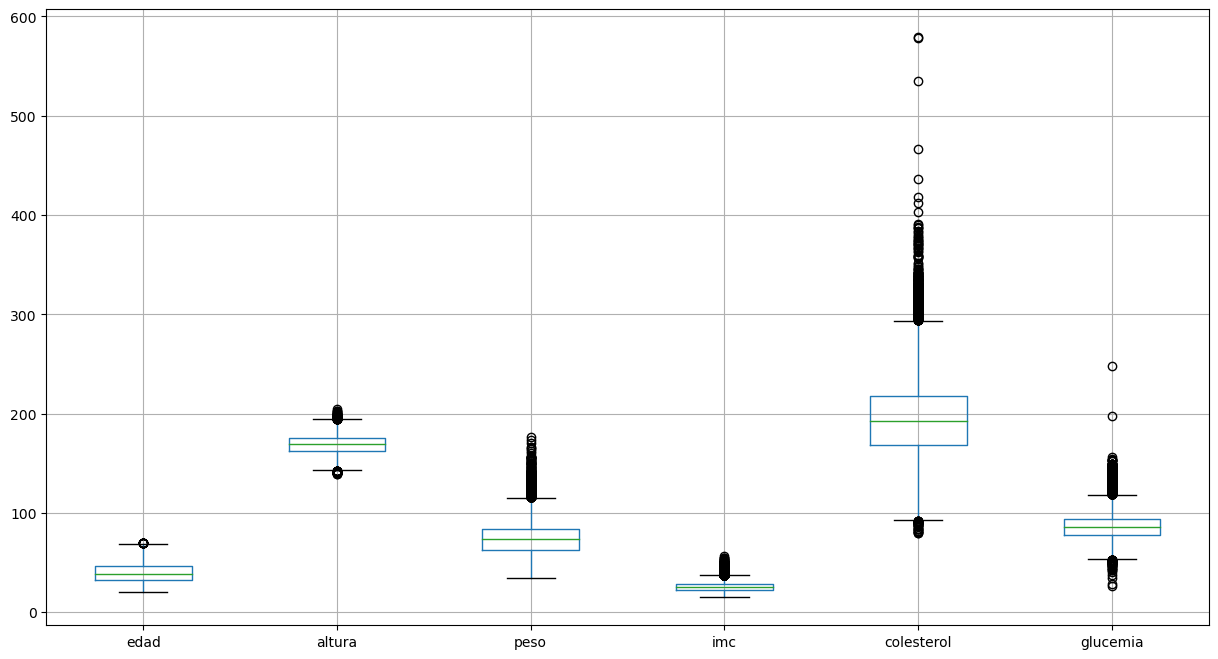

In [52]:
df.boxplot(figsize=(15, 8));

Observamos, que la columna "colesterol" es la que más outliers o datos atípicos tiene. En el resto de columnas los registros están todos cercanos al rango intercuartil. 

Pese a ello, damos por hecho que no son fallos del registro y lo dejamos tal y como está. Lo que debería hacerse en este caso es estudiar a las personas correspondientes con esos valores por seperado. Sin embargo, no cuento con esa información.

# 2. Fuente 2- CSV: Población total española.

# 2.1. Exploración inicial.

In [53]:
df2_original = pd.read_csv('/Users/karmelealonsoaia/Desktop/ironhack_labs/PROYECTOS/3.-project_etl/notebook/poblacion_total_español_edad_sexo.csv', sep=';', encoding='ISO-8859-1')

df2 = df2_original.copy()

In [54]:
dim2_original = df2.shape # Se guardan las dimensiones del data frame original.

df2.shape

(1484, 7)

In [55]:
df2.head()

,Total Nacional,Comunidades y Ciudades Autónomas,Edad (año a año),Españoles/Extranjeros,Sexo,Año,Total
0,Total Nacional,NaN,18 años,Españoles,Hombres,2006,221.811
1,Total Nacional,NaN,18 años,Españoles,Hombres,2005,227.872
2,Total Nacional,NaN,18 años,Españoles,Hombres,2004,236.595
3,Total Nacional,NaN,18 años,Españoles,Hombres,2003,246.163
4,Total Nacional,NaN,18 años,Españoles,Hombres,2002,254.126


In [56]:
df2.columns # Inspecciono los nombres de las columnas, aunque en este caso son pocas y podían observarse a simple vista.

Index(['Total Nacional', 'Comunidades y Ciudades Autónomas',
       'Edad (año a año)', 'Españoles/Extranjeros', 'Sexo', 'Año', 'Total'],
      dtype='object')

In [57]:
df2.info() # Lo mismo con el tipo de dato y los valores nulos que tiene cada una de las columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Total Nacional                    1484 non-null   object 
 1   Comunidades y Ciudades Autónomas  0 non-null      float64
 2   Edad (año a año)                  1484 non-null   object 
 3   Españoles/Extranjeros             1484 non-null   object 
 4   Sexo                              1484 non-null   object 
 5   Año                               1484 non-null   int64  
 6   Total                             1484 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 81.3+ KB


Observamos ahora si hay valores duplicados:

In [58]:
df2.duplicated().any() # En este caso, no nos encontramos con ninguno.

False

# 2.2. Limpieza y transformación. 

Al igual que con el DataFrame anterior, decido eliminar todas aquellas columnas que no aporten ninguna información relevante con respecto al estudio que se está realizando o aquellas de las que desconozca su significado.

In [59]:
columnas_a_eliminar = ["Total Nacional", "Comunidades y Ciudades Autónomas", "Españoles/Extranjeros"]

In [60]:
df2 = df2.drop(columnas_a_eliminar, axis=1)
df2

,Edad (año a año),Sexo,Año,Total
0,18 años,Hombres,2006,221.811
1,18 años,Hombres,2005,227.872
2,18 años,Hombres,2004,236.595
3,18 años,Hombres,2003,246.163
4,18 años,Hombres,2002,254.126
...,...,...,...,...
1479,70 años,Mujeres,2004,4.450
1480,70 años,Mujeres,2003,4.572
1481,70 años,Mujeres,2002,3.688
1482,70 años,Mujeres,2001,3.563


Con el fin de que el formato y el contenido de este dataframe encaje con el anterior (así como con los consecutivos), y pueda así realizarse un estudio posterior, me dispongo a modificarlo a continuación.

In [61]:
df2.columns = df2.columns.str.lower() # Cambio, en primer lugar, los nombres de columnas a minuscula.

In [62]:
df2 = df2.rename(columns=lambda x: x.replace(" ", "_"))

In [63]:
df2.head()

,edad_(año_a_año),sexo,año,total
0,18 años,Hombres,2006,221.811
1,18 años,Hombres,2005,227.872
2,18 años,Hombres,2004,236.595
3,18 años,Hombres,2003,246.163
4,18 años,Hombres,2002,254.126


In [64]:
df2 = df2.rename(columns={"edad_(año_a_año)": 'edad'}) # Le cambio el nombre a esta columna concretamente, para que sea igual al anterior también.

También modifico el contenido del interior de las columnas. 

En el caso de la columna "edad", pretendo quitar todo aquello que no pueda, más adelante, modificarse a formato integer, con el fin de que en el estudio pueda manipularse y estudiarse de forma sencilla.

In [65]:
df2["edad"] = df2["edad"].str.replace(" años", "", regex=False) 

In [66]:
df2['edad'] = pd.to_numeric(df2['edad'].str.replace(',', '.'))
df2['edad'] = df2['edad'].astype('int64')

In [67]:
df2 = df2.replace(["Hombres"], "hombre") # Modifico el contenido para que coincida con el anterior.
df2 = df2.replace(["Mujeres"], "mujer")

In [68]:
df2.edad.unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70])

In [69]:
df2.sexo.unique()

array(['hombre', 'mujer'], dtype=object)

In [70]:
df2.año.unique()

array([2006, 2005, 2004, 2003, 2002, 2001, 2000])

Dado que el estudio de la tabla anterior se llevó a cabo en el período de 2004 a 2006, procederé a eliminar todas las filas que no correspondan a estos años. 
Esto se debe a que no sería coherente incluir datos que estén fuera del rango temporal del estudio anterior, pues los resultados que obtendríamos no tendrían coherencia alguna, por lo que no podrían obtenerse conclusiones de los mismos.

Del mismo modo, en relación con las edades, el rango previamente mencionado abarca desde los 21 hasta los 70 años.
En consecuencia, se eliminarán las filas que contengan edades fuera de este intervalo, ya que, por el mimso motivo que el caso anterior, sería un sinsentido incluir datos que no se ajusten al rango especificado.

In [71]:
df2 = df2.loc[(df2['año'] >= 2004) & (df2['año'] <= 2006)] # Utilizo df.loc para seleccionar las filas que cumplen con la condición de que el año esté en el intervalo 2004-2006. .

In [72]:
df2 = df2.loc[(df2['edad'] >= 21) & (df2['edad'] <= 70)] # Lo mismo pero con la condición de que la edad esté entre los 21 y los 70.

In [73]:
df2.edad.unique()

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70])

In [74]:
df2.año.unique()

array([2006, 2005, 2004])

Revisamos aquí también que no haya ningún valor especialemnte atípico para cada una de las columnas númericas de la tabla y observamos sus estadísticas.

In [75]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,600.0,45.500000,14.442910,21.00,33.000,45.5000,58.00000,70.000
año,600.0,2005.000000,0.817178,2004.00,2004.000,2005.0000,2006.00000,2006.000
total,600.0,149.039437,127.758379,4.45,23.344,103.7505,271.01325,346.671


Lo mismo con las columnas no numéricas.

In [76]:
df2.describe(include = "object")

,sexo
count,600
unique,2
top,hombre
freq,300


# 3. Fuente 3- Web Scraping con Beautiful Soup: Estudio poblacional sobre la Resistencia a la Insulina (RI).

In [77]:
# URL of the website you want to extract HTML from
url = 'https://www.elsevier.es/es-revista-endocrinologia-nutricion-12-articulo-relacion-resistencia-insulina-con-diferentes-S1575092211002403'

In [78]:
# Send a GET request to the URL
html = req.get(url)

In [79]:
# Parse the HTML content of the page
soup = bs(html.content, 'html.parser')

In [80]:
# Find all elements with the class name 'elsevierItemMultimediaTablaTabla'
elements = soup.find_all(class_='elsevierItemMultimediaTablaTabla')


# 3.1. Tabla 1.

In [81]:
# Itero sobre los elementos para imprimir su contenido HTML.
for elem in elements[2:3]:
    table = elem.find('table')
    table_rows = table.find_all('tr') # Dentro del elemento "table", localizo los elementos "tr".
    data = []

    # Itero los elementos 'tr' con el fin de extraer los datos de los elementos 'td' y 'th'.
    for tr in table_rows:
        row = tr.find_all(['td', 'th'])
        
        clean_row = [e.text.strip() for e in row] #Quito cualquier espacio o salto de linea para dejar limpia la tabla
        data.append(clean_row)

    df3 = pd.DataFrame(data)
    

In [82]:
df3

,0,1,2,3
0,Edad (años),Total,Mujeres,Varones
1,Menores de 31,"26,3%","21,2%","33,3%"
2,31- 42,"26,5%","19,3%","36,5%"
3,43-54,"38,1%","31,3%","46,3%"
4,55-65,"52,0%","53,0%","50,8%"
5,Mayores de 65,"49,1%","51,9%","44,1%"
6,Total,"39,8%","37,1%","43,6%"
7,P,"< 0,001","< 0,001","0,427"


In [83]:
df3.columns = df3.iloc[0] #Utlizo los valores de la primera fila como los nombres de las columnas.
df3 = df3.iloc[1:] #Elimino la primera fila (que ahora se ha convertido en la fila de nombres de columna).

In [84]:
df3 = df3.reset_index(drop=True) # Restablezo el índice.

In [85]:
df3

,Edad (años),Total,Mujeres,Varones
0,Menores de 31,"26,3%","21,2%","33,3%"
1,31- 42,"26,5%","19,3%","36,5%"
2,43-54,"38,1%","31,3%","46,3%"
3,55-65,"52,0%","53,0%","50,8%"
4,Mayores de 65,"49,1%","51,9%","44,1%"
5,Total,"39,8%","37,1%","43,6%"
6,P,"< 0,001","< 0,001","0,427"


In [86]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Edad (años)  7 non-null      object
 1   Total        7 non-null      object
 2   Mujeres      7 non-null      object
 3   Varones      7 non-null      object
dtypes: object(4)
memory usage: 356.0+ bytes


In [87]:
df3.columns = df3.columns.str.lower() # Modifico todos los nombres de columnas a minuscula.

In [88]:
df3 = df3.rename(columns={"edad (años)": 'edad'}) # Cambio algunos nombres de columnas por comodidad.
df3 = df3.rename(columns={"varones": 'hombres'})

In [89]:
df3 = df3.replace(["Menores de 31"], "< 31") # Y también algunos valores de la columna "edad".
df3 = df3.replace(["Mayores de 65"], "65 +")
df3 = df3.replace(["Total"], "total")
df3 = df3.replace(["P"], "p")

In [90]:
df3

,edad,total,mujeres,hombres
0,< 31,"26,3%","21,2%","33,3%"
1,31- 42,"26,5%","19,3%","36,5%"
2,43-54,"38,1%","31,3%","46,3%"
3,55-65,"52,0%","53,0%","50,8%"
4,65 +,"49,1%","51,9%","44,1%"
5,total,"39,8%","37,1%","43,6%"
6,p,"< 0,001","< 0,001","0,427"


# 3.2. Tabla 2.

In [91]:
for elem in elements[3:4]: #Realizo lo mismo que en el caso anterior.
    table = elem.find('table')
    table_rows = table.find_all('tr')
    data = []

    for tr in table_rows:
        row = tr.find_all(['td', 'th'])
        clean_row = [e.text.strip() for e in row]
        data.append(clean_row)

    df4 = pd.DataFrame(data)

In [92]:
df4

,0,1,2,3
0,,RI (n=270),No RI (n=408),P
1,Peso (kg),"80,1 (15,6)","62,3 (13,1)","< 0,001"
2,IMC (kg/m2),"30,5 (4,7)","26,2 (4,4)","< 0,001"
3,PCB (cm),"102,0 (12,1)","89,7 (12,2)","< 0,001"
4,PCD (cm),"101,1 (11,9)","88,4 (12,4)","< 0,001"
5,DSA (cm),"24,4 (4,3)","20,3 (3,9)","< 0,001"
6,Edad (años),"55,6 (16,2)","49,3 (16,8)","< 0,001"
7,HTA,"56,3% (n=143)","43,7% (n=111)","< 0,001"
8,cHDL (mg/dl),"56,4 (12,8)","65,4 (15,4)","< 0,001"
9,Colesterol no HDL (mg/dl),"126,6 (32,4)","112,6 (31,9)","< 0,001"


In [93]:
df4.columns = df4.iloc[0] # #Utlizo los valores de la primera fila como los nombres de las columnas.
df4 = df4.iloc[1:] # Cambio algunos nombres de columnas por comodidad.

In [94]:
df4 = df4.reset_index(drop=True) # Restablezco el índice.

In [95]:
df4

,,RI (n=270),No RI (n=408),P
0,Peso (kg),"80,1 (15,6)","62,3 (13,1)","< 0,001"
1,IMC (kg/m2),"30,5 (4,7)","26,2 (4,4)","< 0,001"
2,PCB (cm),"102,0 (12,1)","89,7 (12,2)","< 0,001"
3,PCD (cm),"101,1 (11,9)","88,4 (12,4)","< 0,001"
4,DSA (cm),"24,4 (4,3)","20,3 (3,9)","< 0,001"
5,Edad (años),"55,6 (16,2)","49,3 (16,8)","< 0,001"
6,HTA,"56,3% (n=143)","43,7% (n=111)","< 0,001"
7,cHDL (mg/dl),"56,4 (12,8)","65,4 (15,4)","< 0,001"
8,Colesterol no HDL (mg/dl),"126,6 (32,4)","112,6 (31,9)","< 0,001"
9,Triglicéridos (mg/dl),"135,0 (86,9)","100,1 (78,7)","< 0,001"


In [96]:
df4.shape

(10, 4)

In [97]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0                  10 non-null     object
 1   RI (n=270)     10 non-null     object
 2   No RI (n=408)  10 non-null     object
 3   P              10 non-null     object
dtypes: object(4)
memory usage: 452.0+ bytes


In [98]:
indices_eliminar4 = [2, 3, 4, 6, 9] # Voy a eliminar en primer lugar las filas que no me interesan

In [99]:
df4 = df4.drop(indices_eliminar4, axis=0)

In [100]:
df4

,,RI (n=270),No RI (n=408),P
0,Peso (kg),"80,1 (15,6)","62,3 (13,1)","< 0,001"
1,IMC (kg/m2),"30,5 (4,7)","26,2 (4,4)","< 0,001"
5,Edad (años),"55,6 (16,2)","49,3 (16,8)","< 0,001"
7,cHDL (mg/dl),"56,4 (12,8)","65,4 (15,4)","< 0,001"
8,Colesterol no HDL (mg/dl),"126,6 (32,4)","112,6 (31,9)","< 0,001"


In [101]:
df4 = df4.replace(r'\(.*\)', '', regex=True) # Elimino aquí todo el contenido entre paréntesis.

In [102]:
df4

,,RI (n=270),No RI (n=408),P
0,Peso,"80,1","62,3","< 0,001"
1,IMC,"30,5","26,2","< 0,001"
5,Edad,"55,6","49,3","< 0,001"
7,cHDL,"56,4","65,4","< 0,001"
8,Colesterol no HDL,"126,6","112,6","< 0,001"


In [103]:
df4 = df4.rename(columns={"": 'indicadores'})
df4 = df4.rename(columns={"RI (n=270)": 'RI'}) #le cambio el nombre de la columna por comodidad.
df4 = df4.rename(columns={"No RI (n=408)": 'no_RI'})
df4 = df4.rename(columns={"P": 'p'})


In [104]:
df4['indicadores'] = df4['indicadores'].replace({
    'Peso ': 'peso',
    'Edad ': 'edad',
    'cHDL ': 'colesterol_HDL',
    'Colesterol no HDL ': 'colesterol_no_HDL'
    })

In [105]:
df4

,indicadores,RI,no_RI,p
0,peso,"80,1","62,3","< 0,001"
1,IMC,"30,5","26,2","< 0,001"
5,edad,"55,6","49,3","< 0,001"
7,colesterol_HDL,"56,4","65,4","< 0,001"
8,colesterol_no_HDL,"126,6","112,6","< 0,001"


Para informar al lector y a cualquiera que no esté muy familiarizado con términos médicos, el colesterol HDL se conoce comúnmente como el 'colesterol bueno' porque ayuda a eliminar el exceso de colesterol de las arterias, reduciendo así el riesgo de enfermedades cardíacas. Por otro lado, el 'colesterol no HDL' es una medida que incluye todo el colesterol que no es HDL y generalmente se considera un indicador del 'colesterol malo' o dañino para la salud cardíaca. Esta distinción es útil para evaluar el riesgo de enfermedades cardiovasculares.

In [106]:
df4['RI'] = pd.to_numeric(df4['RI'].str.replace(',', '.'))
df4['RI'] = df4['RI'].astype('float64')

In [107]:
df4['no_RI'] = pd.to_numeric(df4['no_RI'].str.replace(',', '.')) #Para estudios posteriores, igual que en los casos anteriores, convierto estas dos columnas a tipo float.
df4['no_RI'] = df4['no_RI'].astype('float64')

In [108]:
df4 = df4.reset_index(drop=True) #Restablezco de nuevo el índice.

In [109]:
df4

,indicadores,RI,no_RI,p
0,peso,80.1,62.3,"< 0,001"
1,IMC,30.5,26.2,"< 0,001"
2,edad,55.6,49.3,"< 0,001"
3,colesterol_HDL,56.4,65.4,"< 0,001"
4,colesterol_no_HDL,126.6,112.6,"< 0,001"


# 3.3. Tabla 3.

In [110]:
for elem in elements[4:5]:
    table = elem.find('table')
    table_rows = table.find_all('tr')
    data = []

    for tr in table_rows:
        row = tr.find_all(['td', 'th'])
        clean_row = [e.text.strip() for e in row]
        data.append(clean_row)

    df5 = pd.DataFrame(data)

In [111]:
df5

,0,1,2
0,,Coeficiente de correlación,P
1,Peso,"0,421","<0,001"
2,IMC,"0,447","<0,001"
3,PCB,"0,451","<0,001"
4,PCD,"0,458","<0,001"
5,DSA,"0,474","<0,001"


In [112]:
df5.columns = df5.iloc[0] # #Utlizo los valores de la primera fila como los nombres de las columnas.
df5 = df5.iloc[1:] # Cambio algunos nombres de columnas por comodidad.

In [113]:
df5 = df5.reset_index(drop=True) #Restablezco el índice.

In [114]:
df5

,,Coeficiente de correlación,P
0,Peso,"0,421","<0,001"
1,IMC,"0,447","<0,001"
2,PCB,"0,451","<0,001"
3,PCD,"0,458","<0,001"
4,DSA,"0,474","<0,001"


In [115]:
df5.shape

(5, 3)

In [116]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0                               5 non-null      object
 1   Coeficiente de correlación  5 non-null      object
 2   P                           5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


In [117]:
indices_eliminar5 = [2, 3, 4] # Elimino en primer lugar las filas que no me interesan.

In [118]:
df5 = df5.drop(indices_eliminar5, axis=0)

In [119]:
df5.columns = df5.columns.str.lower() # Cambio todos los nombres de columnas a minuscula.

In [120]:
df5 = df5.rename(columns={"coeficiente de correlación": 'coeficiente_correlación'}) # Le cambio el nombre a esta columna en concreto.

In [121]:
df5['coeficiente_correlación'] = pd.to_numeric(df5['coeficiente_correlación'].str.replace(',', '.')) # Y convierto esta columna en tipo float para el estudio posterior.
df5['coeficiente_correlación'] = df5['coeficiente_correlación'].astype('float64')

In [122]:
df5

,,coeficiente_correlación,p
0,Peso,0.421,"<0,001"
1,IMC,0.447,"<0,001"


# 4. DataFrames Resultantes.

In [123]:
df

,sexo,edad,estudios,clase_social,ejercicio,dieta_mediterranea,consumo_tabaco,altura,peso,imc,colesterol,ct,glucemia,gluc
0,mujer,57,secundarios,III,si,no,no,166.0,62.0,22.5,185,normal,84,normal
1,hombre,28,primarios,III,si,si,no,181.5,82.0,24.9,197,normal,62,normal
2,hombre,25,universitarios,I,no,no,no,177.0,69.0,22.0,229,limitrofe,83,normal
3,hombre,50,secundarios,III,no,no,si,171.0,86.0,29.4,272,alto,110,prediabetes
4,mujer,33,secundarios,II,si,no,no,154.0,45.0,19.0,191,normal,81,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48361,hombre,31,secundarios,II,si,si,no,186.0,89.5,25.9,148,normal,88,normal
48362,mujer,31,primarios,III,si,si,no,161.0,64.0,24.7,207,limitrofe,83,normal
48363,mujer,41,secundarios,I,si,si,no,165.0,68.0,25.0,177,normal,68,normal
48364,hombre,36,secundarios,I,no,no,no,173.0,77.0,25.7,244,alto,76,normal


In [124]:
df2

,edad,sexo,año,total
84,21,hombre,2006,248.031
85,21,hombre,2005,256.159
86,21,hombre,2004,270.677
91,21,mujer,2006,235.545
92,21,mujer,2005,243.919
...,...,...,...,...
1471,70,hombre,2005,5.844
1472,70,hombre,2004,4.475
1477,70,mujer,2006,6.239
1478,70,mujer,2005,5.515


In [125]:
df3

,edad,total,mujeres,hombres
0,< 31,"26,3%","21,2%","33,3%"
1,31- 42,"26,5%","19,3%","36,5%"
2,43-54,"38,1%","31,3%","46,3%"
3,55-65,"52,0%","53,0%","50,8%"
4,65 +,"49,1%","51,9%","44,1%"
5,total,"39,8%","37,1%","43,6%"
6,p,"< 0,001","< 0,001","0,427"


In [126]:
df4

,indicadores,RI,no_RI,p
0,peso,80.1,62.3,"< 0,001"
1,IMC,30.5,26.2,"< 0,001"
2,edad,55.6,49.3,"< 0,001"
3,colesterol_HDL,56.4,65.4,"< 0,001"
4,colesterol_no_HDL,126.6,112.6,"< 0,001"


In [127]:
df5

,,coeficiente_correlación,p
0,Peso,0.421,"<0,001"
1,IMC,0.447,"<0,001"


# 5. Exportación de los data frames limpios.

In [128]:
df.to_csv('df_clean.csv', index=False)

In [129]:
df2.to_csv('df2_clean.csv', index=False)

In [130]:
df3.to_csv('df3_clean.csv', index=False)

In [131]:
df4.to_csv('df4_clean.csv', index=False)

In [132]:
df5.to_csv('df5_clean.csv', index=False)